In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_csv('D:/jupyter notebooks/Hydrological Map/100m_accu.csv')
df

,OID,grid_code
0,-1,0.0
1,-1,0.0
2,-1,0.0
3,-1,0.0
4,-1,0.0
...,...,...
340170,-1,0.0
340171,-1,1.0
340172,-1,2.0
340173,-1,0.0


In [3]:
counts = df.groupby('grid_code').size()
print(counts)

grid_code
0.0       142611
1.0        43550
2.0        26992
3.0        18932
4.0        13763
           ...  
4038.0         1
4076.0         1
4106.0         1
4124.0         1
4137.0         1
Length: 1069, dtype: int64


In [6]:
counts_df = counts.reset_index()
counts_df.columns = ['grid_code', 'count']
output_csv_path = r"D:/jupyter notebooks/Hydrological Map/counts.csv"
counts_df.to_csv(output_csv_path, index=False)

In [18]:
df = pd.read_csv('D:/jupyter notebooks/Hydrological Map/counts.csv')

In [19]:
df['cumulative_points'] = df['Number'].iloc[::-1].cumsum()[::-1]
df['2difference'] = -df['Number'].diff()
df['2difference_log10'] = df['2difference'].apply(np.log10)
df['Cumulative_log10'] = df['cumulative_points'].apply(np.log10)
df

,Accumulation,Number,cumulative_points,2difference,2difference_log10,Cumulative_log10
0,0,142611,340175,NaN,NaN,5.531702
1,1,43550,197564,99061.0,4.995903,5.295708
2,2,26992,154014,16558.0,4.219008,5.187560
3,3,18932,127022,8060.0,3.906335,5.103879
4,4,13763,108090,5169.0,3.713407,5.033786
...,...,...,...,...,...,...
1064,4038,1,5,-0.0,-inf,0.698970
1065,4076,1,4,-0.0,-inf,0.602060
1066,4106,1,3,-0.0,-inf,0.477121
1067,4124,1,2,-0.0,-inf,0.301030


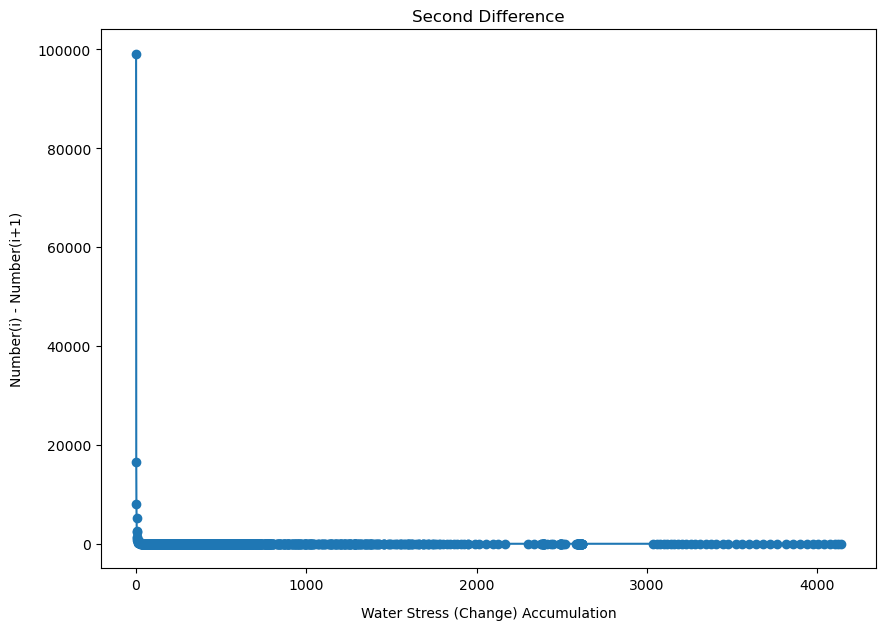

In [24]:
# 绘制图表
plt.figure(figsize=(10, 7))
plt.plot(df['Accumulation'], df['2difference'], marker='o')
plt.xlabel('Water Stress (Change) Accumulation', labelpad=10)
plt.ylabel('Number(i) - Number(i+1)', labelpad=10)
plt.title('Second Difference')
plt.show()